In [1]:
import os
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
# import warnings
# warnings.filterwarnings('ignore')
import librosa
import librosa.display as lplt
import IPython
from tflite_model_maker import audio_classifier
import tflite_model_maker as mm
import glob
import random
from IPython.display import Audio, Image, display
from scipy.io import wavfile
import string as str


# must download librosa, tflite-model-maker


In [2]:
# test_files = os.path.join(
#     'c:', '../capstone-project/dataset/GTZAN-dataset/Data', 'genres_original/*/*.wav')

# def get_random_audio_file():
#   test_list = glob.glob(test_files)
#   random_audio_path = random.choice(test_list)
#   return random_audio_path


# def show_song(audio_path):
#   sample_rate, audio_data = wavfile.read(audio_path, 'rb')
#   display(Audio(audio_data, rate=sample_rate))


# random_audio = get_random_audio_file()
# show_song(random_audio)


In [3]:

pd.set_option('display.max_columns', None)
df = pd.read_csv(
    '../capstone-project/Data/features_30_sec.csv')

df.head()


,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,3805.839606,9.015054e+05,0.083045,0.000767,-4.529724e-05,0.008172,0.000008,0.005698,123.046875,-113.570648,2564.207520,121.571793,295.913818,-19.168142,235.574432,42.366421,151.106873,-6.364664,167.934799,18.623499,89.180840,-13.704891,67.660492,15.343150,68.932579,-12.274110,82.204201,10.976572,63.386311,-8.326573,61.773094,8.803792,51.244125,-3.672300,41.217415,5.747995,40.554478,-5.162882,49.775421,0.752740,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,3550.522098,2.977893e+06,0.056040,0.001448,1.395807e-04,0.005099,-0.000178,0.003063,67.999589,-207.501694,7764.555176,123.991264,560.259949,8.955127,572.810913,35.877647,264.506104,2.907320,279.932922,21.510466,156.477097,-8.560436,200.849182,23.370686,142.555954,-10.099661,166.108521,11.900497,104.358612,-5.555639,105.173630,5.376327,96.197212,-2.231760,64.914291,4.220140,73.152534,-6.012148,52.422142,0.927998,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,3042.260232,7.840345e+05,0.076291,0.001007,2.105576e-06,0.016342,-0.000019,0.007458,161.499023,-90.722595,3319.044922,140.446304,508.765045,-29.093889,411.781219,31.684334,144.090317,-13.984504,155.493759,25.764742,74.548401,-13.664875,106.981827,11.639934,106.574875,-11.783643,65.447945,9.718760,67.908859,-13.133803,57.781425,5.791199,64.480209,-8.907628,60.385151,-1.077000,57.711136,-9.229274,36.580986,2.451690,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,2184.745799,1.493194e+06,0.033309,0.000423,4.583644e-07,0.019054,-0.000014,0.002712,63.024009,-199.544205,5507.517090,150.090897,456.505402,5.662678,257.161163,26.859079,158.267303,1.771399,268.034393,14.234031,126.794128,-4.832006,155.912079,9.286494,81.273743,-0.759186,92.114090,8.137607,71.314079,-3.200653,110.236687,6.079319,48.251999,-2.480174,56.799400,-1.079305,62.289902,-2.870789,51.651592,0.780874,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,3579.757627,1.572978e+06,0.101461,0.001954,-1.756129e-05,0.004814,-0.000010,0.003094,135.999178,-160.337708,5195.291992,126.219635,853.784729,-35.587811,333.792938,22.148071,193.456100,-32.478600,336.276825,10.852294,134.831573,-23.352329,93.257095,0.498434,124.672127,-11.793437,130.073349,1.207256,99.675575,-13.088418,80.254066,-2.813867,86.430626,-6.933385,89.555443,-7.552725,70.943336,-9.164666,75.793404,-4.520576,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [4]:

length_of_songs = df['length'] / 22050 # sample rate of every song
length_of_songs.unique() # unique values of length in seconds

# note: songs are not all the exact same length. 

array([30.01333333, 30.37097506, 30.00798186, 30.17142857, 30.01179138,
       30.09160998, 29.99582766, 29.99292517, 30.39092971, 30.48897959,
       30.07165533, 30.08163265, 30.24126984, 30.33106576, 29.98185941,
       30.1015873 , 30.12154195, 30.21133787, 30.30113379, 30.29115646,
       30.16145125, 30.00018141, 30.13151927, 30.35102041, 29.93197279,
       30.28117914, 30.64888889, 30.20136054, 30.0277551 , 30.48072562,
       30.02176871, 30.27120181, 30.        , 30.40090703, 30.36099773])

In [5]:
genres = df['label'].unique()
for count, i in enumerate(genres):
    print(i)

blues
classical
country
disco
hiphop
jazz
metal
pop
reggae
rock


blues


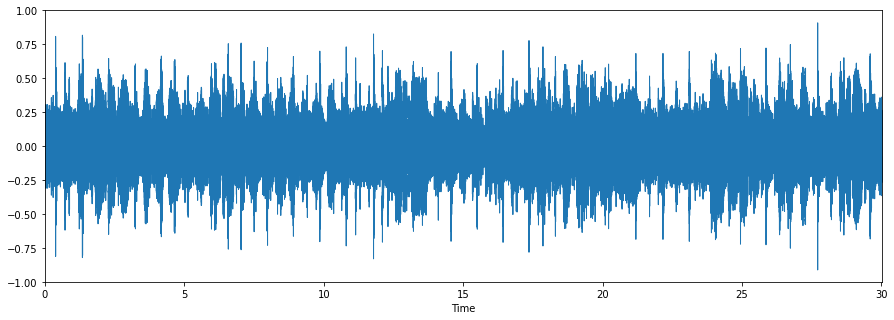

classical


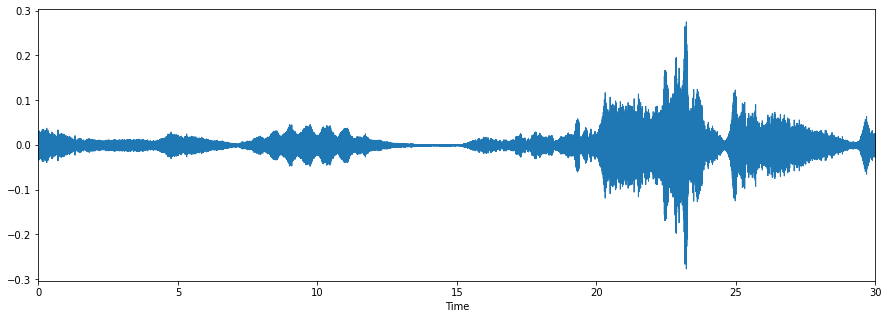

country


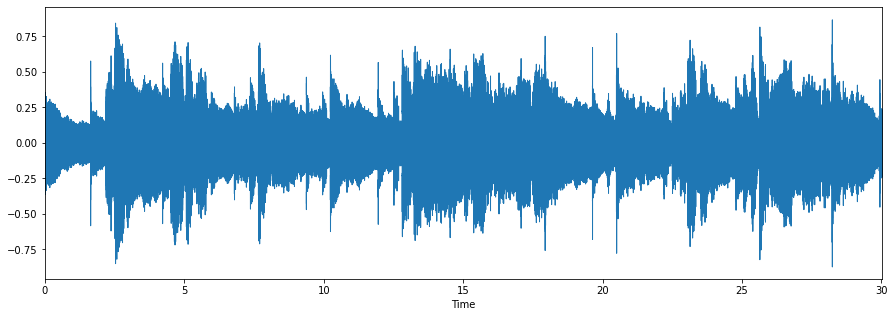

disco


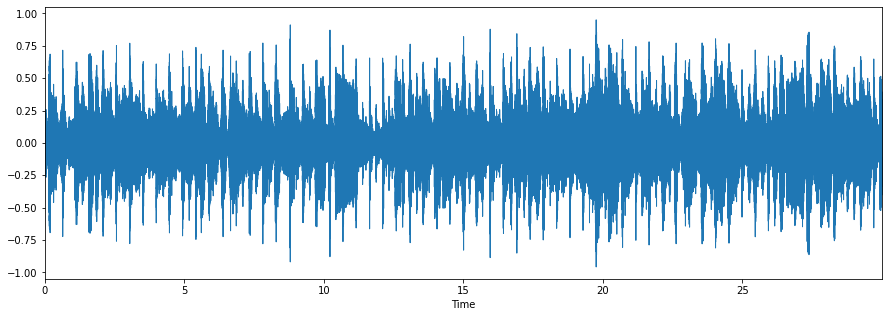

hiphop


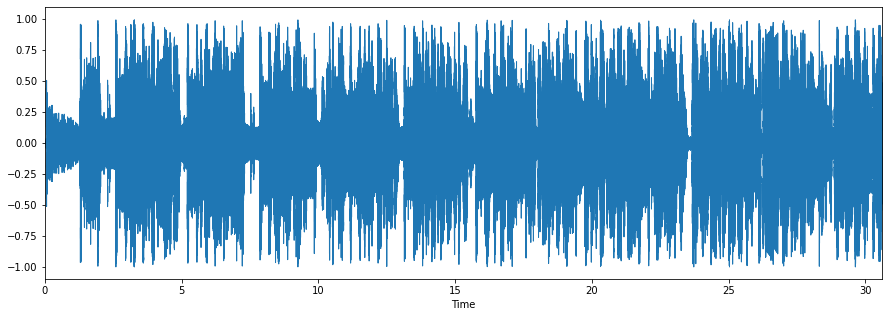

jazz


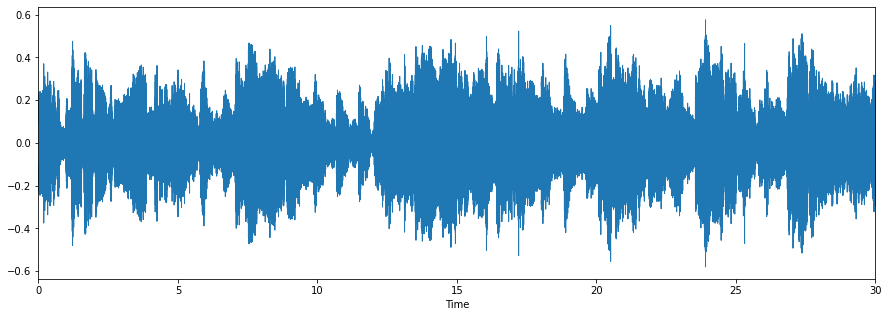

metal


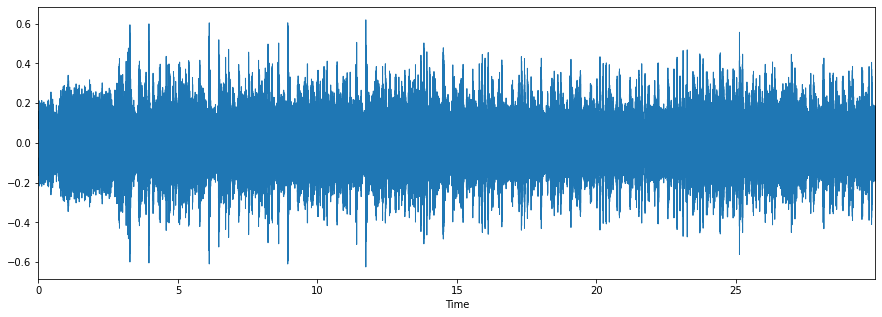

pop


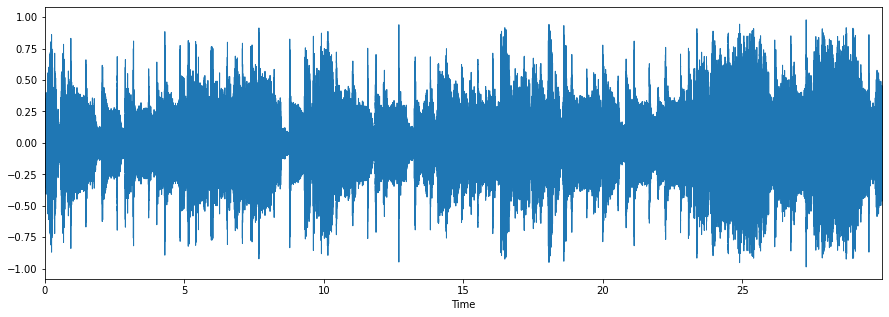

reggae


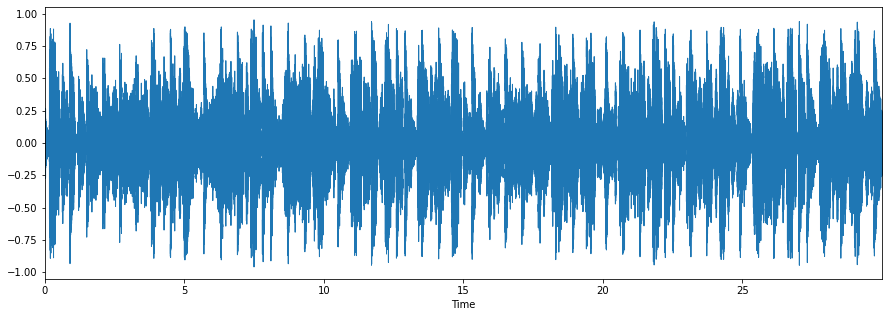

rock


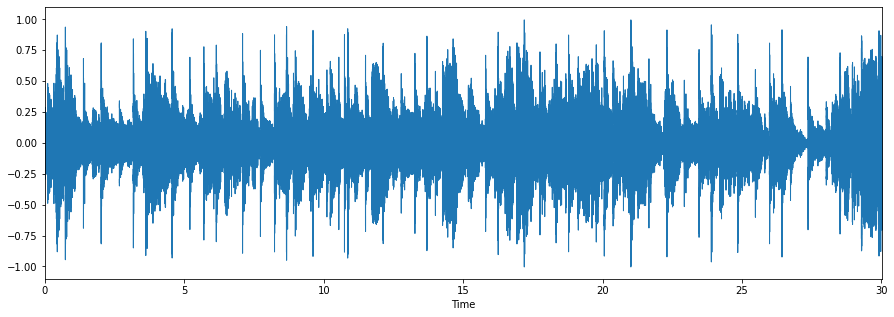

In [6]:
audio_data = {}
for i, label in enumerate(genres):
    song_num = random.randrange(100)
    song_num = f"{song_num:03}"

    audio_fp = '../capstone-project/Data/genres_original/{}/{}.00{}.wav'.format(label, label, song_num)
    audio_data[i], sample_rate = librosa.load(audio_fp)
    audio_data[i], _ = librosa.effects.trim(audio_data[i])

# plots the first sample file in every genre folder
for i in audio_data:
    plt.figure(figsize=(15, 5))
    lplt.waveplot(audio_data[i])
    print(genres[i])
    plt.show()

# note: This is used to visualize the a random song in every genre via wave plot.


In [7]:
spec = audio_classifier.YamNetSpec(
    keep_yamnet_and_custom_heads=True,
    frame_step=3 * audio_classifier.YamNetSpec.EXPECTED_WAVEFORM_LENGTH,
    frame_length=6 * audio_classifier.YamNetSpec.EXPECTED_WAVEFORM_LENGTH)



INFO:tensorflow:Checkpoints are stored in C:\Users\dexte\AppData\Local\Temp\tmpaueyof0x


In [8]:
# data_dir = "../capstone-project/birds_dataset/small_birds_dataset" # example dataset. Don't Use
# data_dir = "../capstone-project/test_data/genres_original"

data_dir = "../capstone-project/modified_data/genres_original"

train_data = audio_classifier.DataLoader.from_folder(
    spec, os.path.join(data_dir, 'train'), cache=True, shuffle=True)
train_data, validation_data = train_data.split(0.8)
test_data = audio_classifier.DataLoader.from_folder(
    spec, os.path.join(data_dir, 'test'), cache=True, shuffle=True)


In [9]:
batch_size = 200
epochs = 20

print('Training the model')
model = audio_classifier.create(
    train_data,
    spec,
    validation_data,
    batch_size=batch_size,
    epochs=epochs)


Training the model
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 classification_head (Dense)  (None, 10)               10250     
                                                                 
Total params: 10,250
Trainable params: 10,250
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
33/33 [==============================] - 502s 14s/step - loss: 1.9687 - acc: 0.3641 - val_loss: 1.6176 - val_acc: 0.7074
Epoch 2/20
33/33 [==============================] - 1s 31ms/step - loss: 1.3706 - acc: 0.6739 - val_loss: 1.2329 - val_acc: 0.7580
Epoch 3/20
33/33 [==============================] - 1s 34ms/step - loss: 1.0834 - acc: 0.7384 - val_loss: 1.0363 - val_acc: 0.7667
Epoch 4/20
33/33 [==============================] - 1s 38ms/step - loss: 0.9286 - acc: 0.7589 - val_loss: 0.9240 - val_acc: 0.7735
Epoch 5/20
33/33 [==================

In [10]:
print('Evaluating the model')
model.evaluate(test_data)


Evaluating the model
29/29 [==============================] - 52s 2s/step - loss: 0.6462 - acc: 0.7844


[0.6461991667747498, 0.7844444513320923]

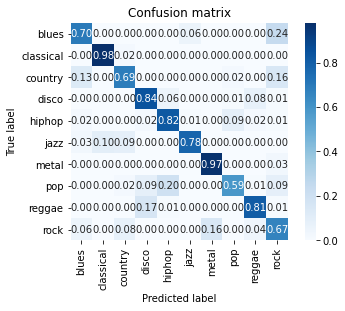

In [11]:
import seaborn as sns

def show_confusion_matrix(confusion, test_labels):
  """Compute confusion matrix and normalize."""
  confusion_normalized = confusion.astype("float") / confusion.sum(axis=1)
  axis_labels = test_labels
  ax = sns.heatmap(
      confusion_normalized, xticklabels=axis_labels, yticklabels=axis_labels,
      cmap='Blues', annot=True, fmt='.2f', square=True)
  plt.title("Confusion matrix")
  plt.ylabel("True label")
  plt.xlabel("Predicted label")

confusion_matrix = model.confusion_matrix(test_data)
show_confusion_matrix(confusion_matrix.numpy(), test_data.index_to_label)


In [13]:
models_path = '../capstone-project'
print(f'Exporting the TFLite model to {models_path}')

model.export(models_path, tflite_filename='genre_classifier_model.tflite')


Exporting the TFLite model to ../capstone-project
INFO:tensorflow:Assets written to: C:\Users\dexte\AppData\Local\Temp\tmpp31plri0\assets


INFO:tensorflow:Assets written to: C:\Users\dexte\AppData\Local\Temp\tmpp31plri0\assets


INFO:tensorflow:TensorFlow Lite model exported successfully: ../capstone-project\genre_classifier_model.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: ../capstone-project\genre_classifier_model.tflite
